<a href="https://colab.research.google.com/github/Himanshu-Tagde/ABC/blob/main/no_count(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/hard.zip
!unzip /content/easy.zip
!unzip /content/medium.zip

Archive:  /content/hard.zip
   creating: hard/
  inflating: hard/w (1).png          
  inflating: hard/w (2).png          
  inflating: hard/w (3).png          
  inflating: hard/w (4).png          
  inflating: hard/w (5).png          
  inflating: hard/w (6).png          
  inflating: hard/w (7).png          
  inflating: hard/w (8).png          
  inflating: hard/w (9).png          
Archive:  /content/easy.zip
   creating: easy/
  inflating: easy/q (1).png          
  inflating: easy/q (10).png         
  inflating: easy/q (11).png         
  inflating: easy/q (12).png         
  inflating: easy/q (13).png         
  inflating: easy/q (2).png          
  inflating: easy/q (3).png          
  inflating: easy/q (4).png          
  inflating: easy/q (5).png          
  inflating: easy/q (6).png          
  inflating: easy/q (7).png          
  inflating: easy/q (8).png          
  inflating: easy/q (9).png          
Archive:  /content/medium.zip
   creating: medium/
  inflating: medium

In [ ]:
!pip install torch torchvision
!pip install yolov5
!pip install ipywidgets

# Import libraries
import torch
from matplotlib import pyplot as plt
import os
import random
from IPython.display import display, Image
import ipywidgets as widgets


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 87.2/87.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 953.5/953.5 kB 46.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139.2/139.2 kB 10.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 417.5/417.5 kB 27.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.5/81.5 kB 6.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.8/66.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
# Load YOLOv5 pre-trained model (small version for speed)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 üöÄ 2025-1-3 Python-3.10.12 torch-2.5.1+cu121 CPU

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.1M/14.1M [00:00<00:00, 312MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


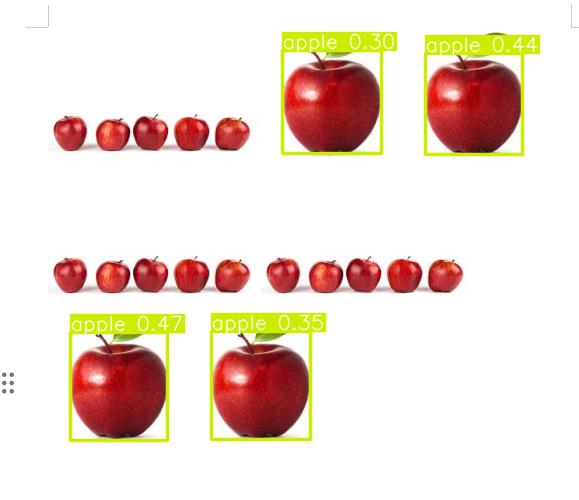

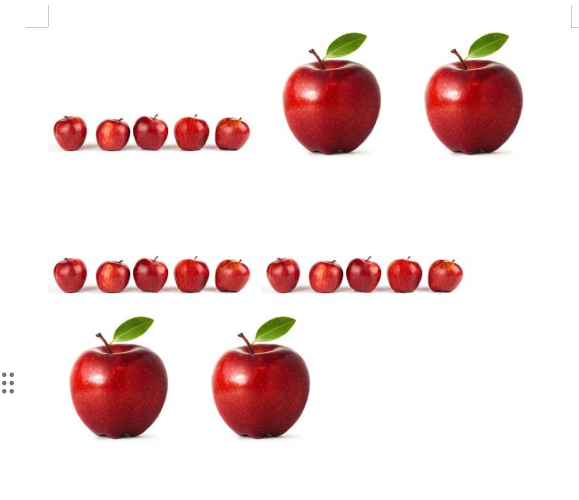

IntText(value=0, description='Your Guess:', style=DescriptionStyle(description_width='initial'))

Button(description='Submit Guess', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

Button(description='Easy', style=ButtonStyle())

Button(description='Medium', style=ButtonStyle())

Button(description='Hard', style=ButtonStyle())

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


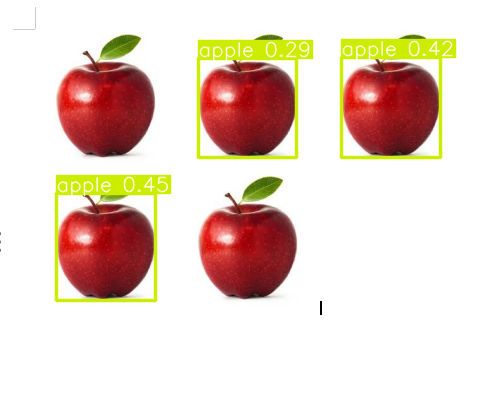

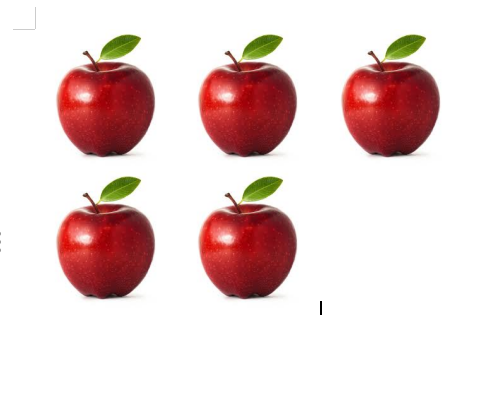

IntText(value=0, description='Your Guess:', style=DescriptionStyle(description_width='initial'))

Button(description='Submit Guess', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


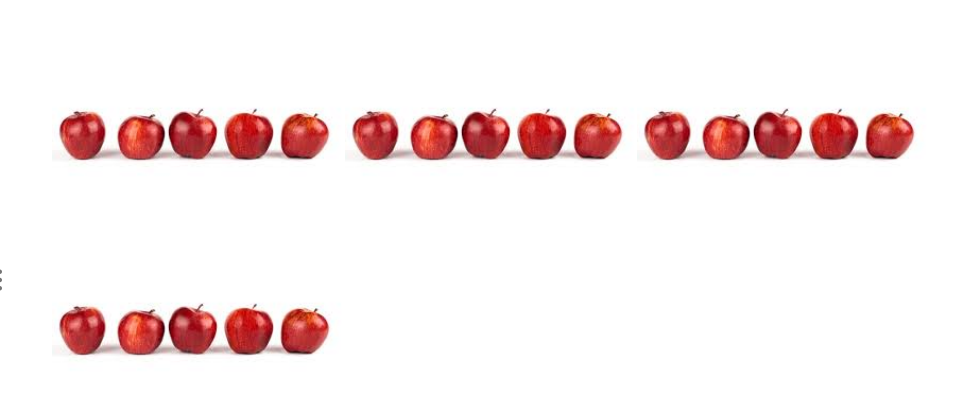

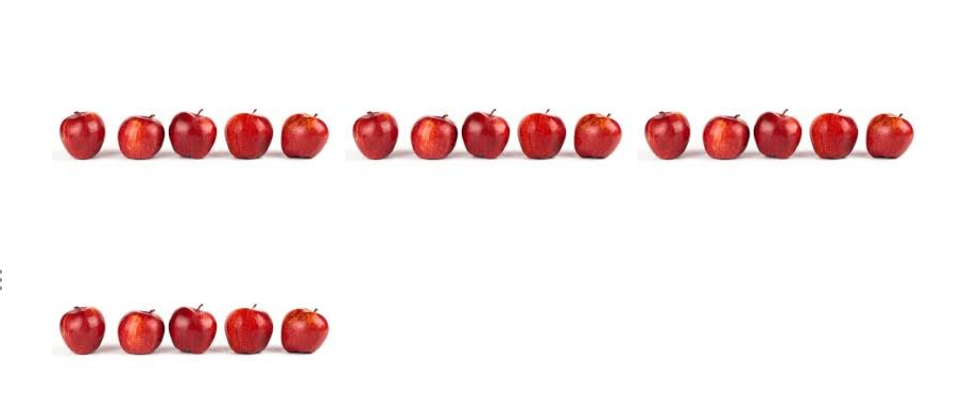

IntText(value=0, description='Your Guess:', style=DescriptionStyle(description_width='initial'))

Button(description='Submit Guess', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

Correct! There are 0 apples in the image.


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


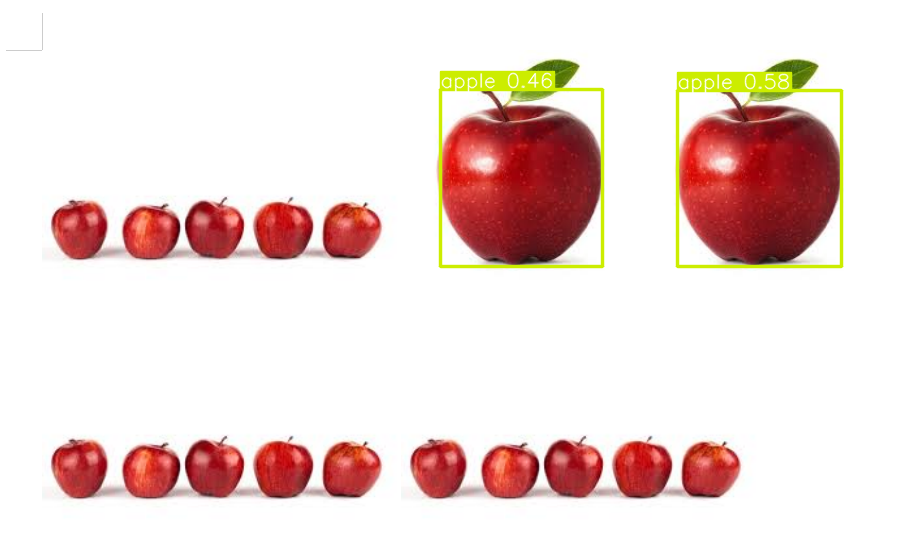

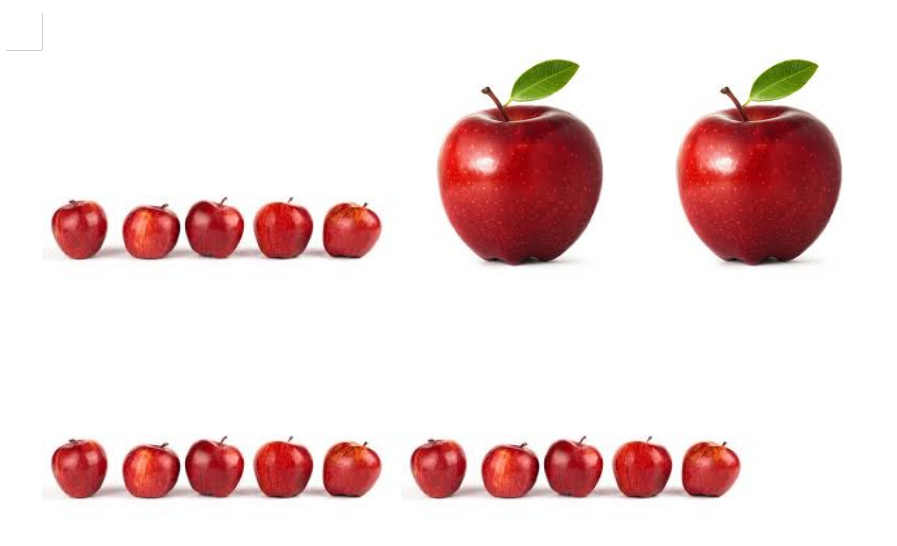

IntText(value=0, description='Your Guess:', style=DescriptionStyle(description_width='initial'))

Button(description='Submit Guess', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

In [ ]:

# Define the difficulty levels
datasets = {
    'easy': '/content/easy',
    'medium': '/content/medium',
    'hard': '/content/hard'
}

fruit_classes_dict = {
    'easy': ['apple'],
    'medium': ['apple'],
    'hard': ['apple']
}


current_difficulty = 'easy'

# Global variables for game state
image_folder = datasets[current_difficulty]
fruit_classes = fruit_classes_dict[current_difficulty]
img_path = ""
fruit_count = 0

# Function to load a new dataset based on the difficulty
def load_new_dataset(difficulty):
    global current_difficulty, image_folder, fruit_classes
    current_difficulty = difficulty
    image_folder = datasets[difficulty]
    fruit_classes = fruit_classes_dict[difficulty]

# Function to select a random image and perform inference
def select_random_image_and_inference():
    global img_path, fruit_count

    image_files = os.listdir(image_folder)
    random_image_file = random.choice(image_files)
    img_path = os.path.join(image_folder, random_image_file)


    results = model(img_path)


    predictions = results.xywh[0]
    detected_classes = predictions[:, -1]
    labels = results.names


    detected_fruit_classes = [labels[int(class_id)] for class_id in detected_classes]

    # Count the number of detected fruits in the selected classes
    fruit_count = sum([detected_fruit_classes.count(fruit) for fruit in fruit_classes])

    # Show the result image with bounding boxes
    results.show()
    display(Image(filename=img_path))
# Function to display the widgets and run the guess-checking logic
def display_game_widgets():
    # Create a widgets for the user to input their guess
    guess_widget = widgets.IntText(
        value=0,
        description='Your Guess:',
        min=0,
        max=20,
        step=1,
        style={'description_width': 'initial'}
    )

    # Create a button to submit the guess
    submit_button = widgets.Button(description="Submit Guess")

    # Create a quit button
    quit_button = widgets.Button(description="Quit")

    # Function to check the guess and display result
    def check_guess(b):
        user_guess = guess_widget.value
        if user_guess == fruit_count:
            print(f"Correct! There are {fruit_count} apples in the image.")
        else:
            print(f"Oops! Your guess was wrong. There are {fruit_count} apples in the image.")

        # Display the next image and allow the user to guess again
        select_random_image_and_inference()
        display_game_widgets()

    # Link the button to the check_guess function
    submit_button.on_click(check_guess)

    # Function to quit the game
    def quit_game(b):
        print("Thank you for playing! The game has ended.")
        quit_button.disabled = True
        submit_button.disabled = True
        guess_widget.disabled = True

    # Link the quit button to quit_game function
    quit_button.on_click(quit_game)

    # Display the widgets
    display(guess_widget)
    display(submit_button)
    display(quit_button)

# Difficulty button handler
def on_difficulty_button_click(b):
    difficulty_level = b.description.lower()
    load_new_dataset(difficulty_level)
    select_random_image_and_inference()
    display_game_widgets()

# Create difficulty buttons
easy_button = widgets.Button(description="Easy")
medium_button = widgets.Button(description="Medium")
hard_button = widgets.Button(description="Hard")

# Link the buttons to the handler
easy_button.on_click(on_difficulty_button_click)
medium_button.on_click(on_difficulty_button_click)
hard_button.on_click(on_difficulty_button_click)

# Display the difficulty buttons
display(easy_button, medium_button, hard_button)

# Start the game by selecting a random image
select_random_image_and_inference()

# Display the game widgets to take a guess
display_game_widgets()


# **beta 2.1**

In [ ]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/q (12).png         
  inflating: test/q (13).png         
  inflating: test/Screenshot (80).png  
  inflating: test/Screenshot (81).png  


Button(description='Easy', style=ButtonStyle())

Button(description='Medium', style=ButtonStyle())

Button(description='Hard', style=ButtonStyle())

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


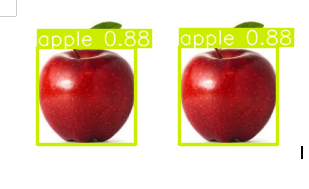

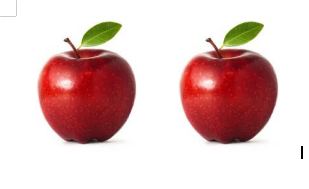

Button(description='1', style=ButtonStyle())

Button(description='20', style=ButtonStyle())

Button(description='2', style=ButtonStyle())

Button(description='17', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

Correct! There are 2 apples in the image.


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


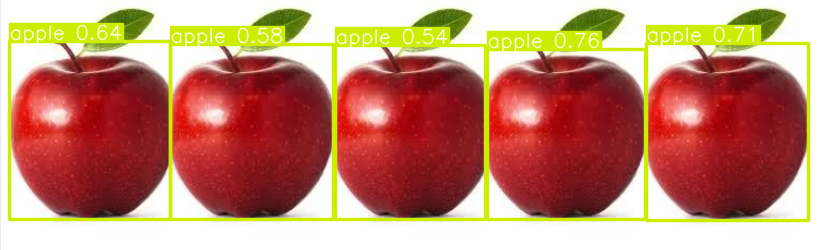

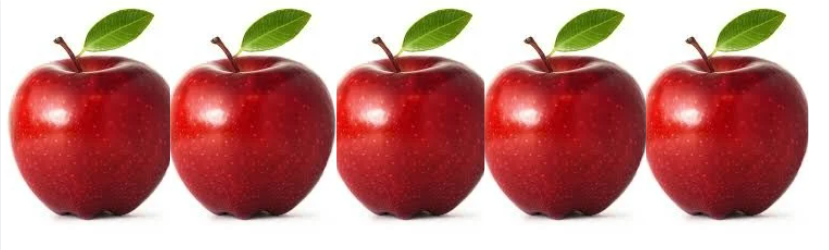

Button(description='19', style=ButtonStyle())

Button(description='5', style=ButtonStyle())

Button(description='18', style=ButtonStyle())

Button(description='1', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

Correct! There are 5 apples in the image.


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


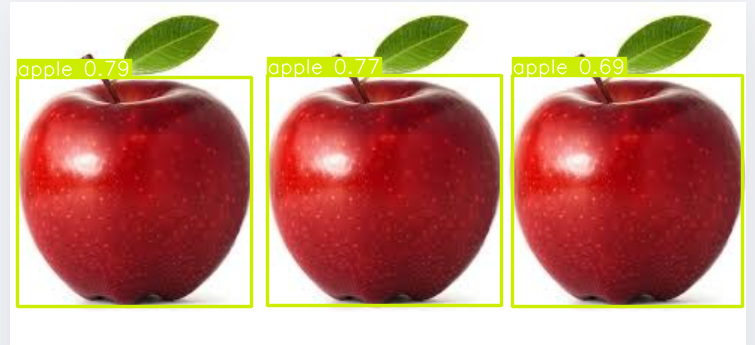

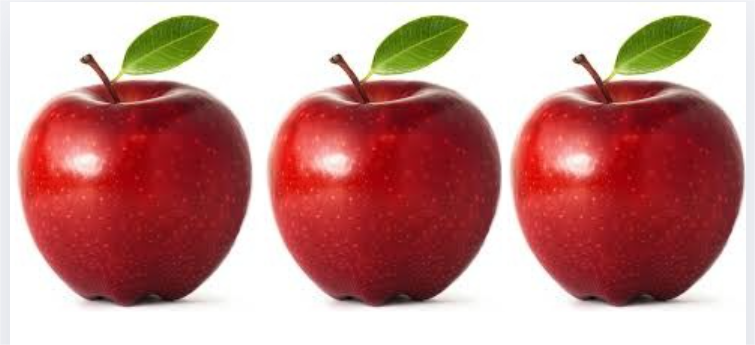

Button(description='3', style=ButtonStyle())

Button(description='10', style=ButtonStyle())

Button(description='18', style=ButtonStyle())

Button(description='5', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

In [ ]:
import random
import os
import ipywidgets as widgets
from IPython.display import display
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# Define the difficulty levels
datasets = {
    'easy': '/content/test',
    'medium': '/content/medium',
    'hard': '/content/hard'
}

fruit_classes_dict = {
    'easy': ['apple'],
    'medium': ['apple'],
    'hard': ['apple']
}

current_difficulty = 'easy'

# Global variables for game state
image_folder = datasets[current_difficulty]
fruit_classes = fruit_classes_dict[current_difficulty]
img_path = ""
fruit_count = 0

# Function to load a new dataset based on the difficulty
def load_new_dataset(difficulty):
    global current_difficulty, image_folder, fruit_classes
    current_difficulty = difficulty
    image_folder = datasets[difficulty]
    fruit_classes = fruit_classes_dict[difficulty]

# Function to select a random image and perform inference
def select_random_image_and_inference():
    global img_path, fruit_count

    # List all images in the selected folder
    image_files = os.listdir(image_folder)

    # Ensure that there are images to select
    if not image_files:
        print("No images found in the selected dataset folder.")
        return

    random_image_file = random.choice(image_files)  # Choose a random image
    img_path = os.path.join(image_folder, random_image_file)  # Full path to image

    results = model(img_path)
    predictions = results.xywh[0]
    detected_classes = predictions[:, -1]
    labels = results.names

    detected_fruit_classes = [labels[int(class_id)] for class_id in detected_classes]
 # Count the number of detected fruits in the selected classes
    fruit_count = sum([detected_fruit_classes.count(fruit) for fruit in fruit_classes])

    # Show the result image with bounding boxes
    results.show()
    display(Image(filename=img_path))

# Function to display the widgets and run the guess-checking logic
def display_game_widgets():
    global fruit_count

    # Generate random options for the user
    options = [fruit_count]  # Correct answer
    while len(options) < 4:
        random_option = random.randint(0, 20)  # Random guess range (can adjust this range)
        if random_option != fruit_count:
            options.append(random_option)

    random.shuffle(options)  # Shuffle the options so the correct answer is random

    # Create the buttons for the options
    option_buttons = [
        widgets.Button(description=str(option)) for option in options
    ]

    # Create a quit button
    quit_button = widgets.Button(description="Quit")

    # Function to check the guess
    def check_guess(b):
        user_guess = int(b.description)
        if user_guess == fruit_count:
            print(f"Correct! There are {fruit_count} apples in the image.")
        else:
            print(f"Oops! Your guess was wrong. There are {fruit_count} apples in the image.")

        # Display the next image and allow the user to guess again
        select_random_image_and_inference()
        display_game_widgets()

    # Link the option buttons to the check_guess function
    for button in option_buttons:
        button.on_click(check_guess)

    # Function to quit the game
    def quit_game(b):
        print("Thank you for playing! The game has ended.")
        quit_button.disabled = True
        for button in option_buttons:
            button.disabled = True

    # Link the quit button to quit_game function
    quit_button.on_click(quit_game)

    # Display the option buttons and quit button
    display(*option_buttons)
    display(quit_button)

# Difficulty button handler
def on_difficulty_button_click(b):
    difficulty_level = b.description.lower()
    load_new_dataset(difficulty_level)
    select_random_image_and_inference()
    display_game_widgets()

# Create difficulty buttons
easy_button = widgets.Button(description="Easy")
medium_button = widgets.Button(description="Medium")
hard_button = widgets.Button(description="Hard")

# Link the buttons to the handler
easy_button.on_click(on_difficulty_button_click)
medium_button.on_click(on_difficulty_button_click)
hard_button.on_click(on_difficulty_button_click)

# Display the difficulty buttons
display(easy_button, medium_button, hard_button)

# Start the game by selecting a random image
select_random_image_and_inference()

# Display the game widgets to take a guess
display_game_widgets()
